# 🏠 House Data Exploration

Este notebook realiza una exploración de datos inicial en el conjunto de datos `house_data.csv`

In [1]:
# ==============================================================================
# PASO 1: IMPORTACIÓN DE LIBRERÍAS
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

print("Librerías importadas y estilo de visualización configurado.")

Librerías importadas y estilo de visualización configurado.


In [2]:
# ==============================================================================
# PASO 2: CARGA DE DATOS LIMPIOS
# ==============================================================================

# Cargar el dataset
df = pd.read_csv('../data/raw/house_data.csv')

# Mostrar información básica del dataset
print(f'Dimensiones del dataset: {df.shape}')
print("\n Primeras filas del dataset:")
print(df.head())    


Dimensiones del dataset: (84, 7)

 Primeras filas del dataset:
     price  sqft  bedrooms  bathrooms    location  year_built  condition
0   495000  1527         2        1.5      Suburb        1956       Good
1   752000  2526         3        2.5    Downtown        1998  Excellent
2   319000  1622         2        1.5       Rural        1975       Fair
3  1210000  3102         4        3.0  Waterfront        2005  Excellent
4   462000  1835         2        2.0       Urban        1982       Good


In [3]:
# Exploratory Data Analysis (EDA)
print("\n Dataset Info:")
print(df.info())

# Checking for missing values to identify data quality issues
print("\n Valores nulos por columna:")
print(df.isnull().sum())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None

 Valores nulos por columna:
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [4]:
# Estadísticas descriptivas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000



--- 3. Análisis de la Variable Objetivo: 'price' ---


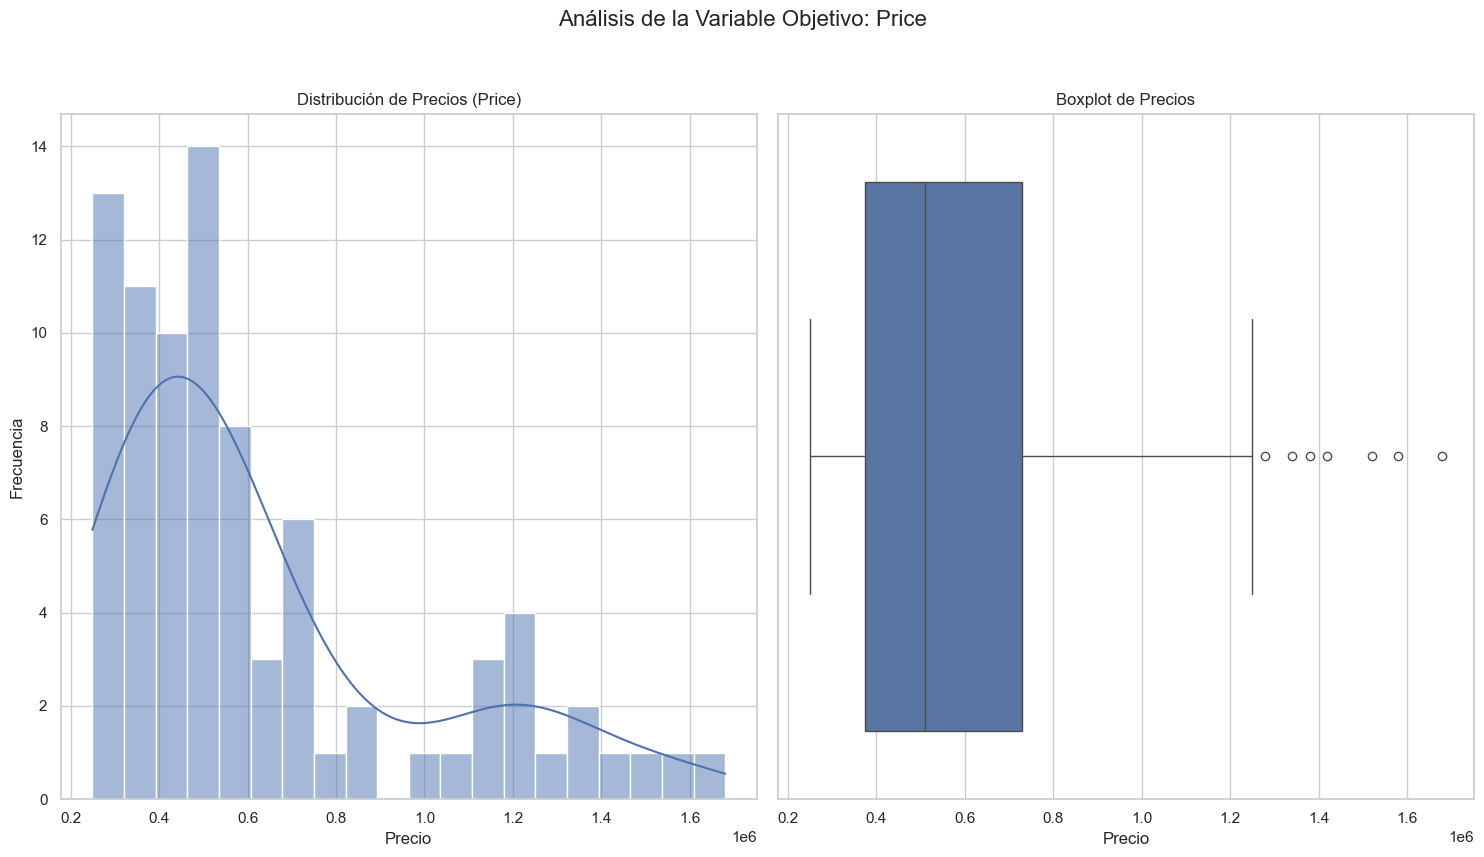


Observaciones sobre 'price':
- La distribución de precios está marcadamente sesgada a la derecha (right-skewed).
- Hipótesis: Una transformación logarítmica podría normalizar la distribución, beneficiando a modelos lineales.


In [5]:
# ==============================================================================
# PASO 3: ANÁLISIS DE LA VARIABLE OBJETIVO (PRICE)
# ==============================================================================
print("\n--- 3. Análisis de la Variable Objetivo: 'price' ---")

plt.figure(figsize=(15, 9))

# Histograma para ver la distribución
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Distribución de Precios (Price)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Boxplot para identificar outliers y asimetría
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot de Precios')
plt.xlabel('Precio')

plt.suptitle('Análisis de la Variable Objetivo: Price', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nObservaciones sobre 'price':")
print("- La distribución de precios está marcadamente sesgada a la derecha (right-skewed).")
print("- Hipótesis: Una transformación logarítmica podría normalizar la distribución, beneficiando a modelos lineales.")


--- 4. Análisis de Variables Numéricas vs. Precio ---


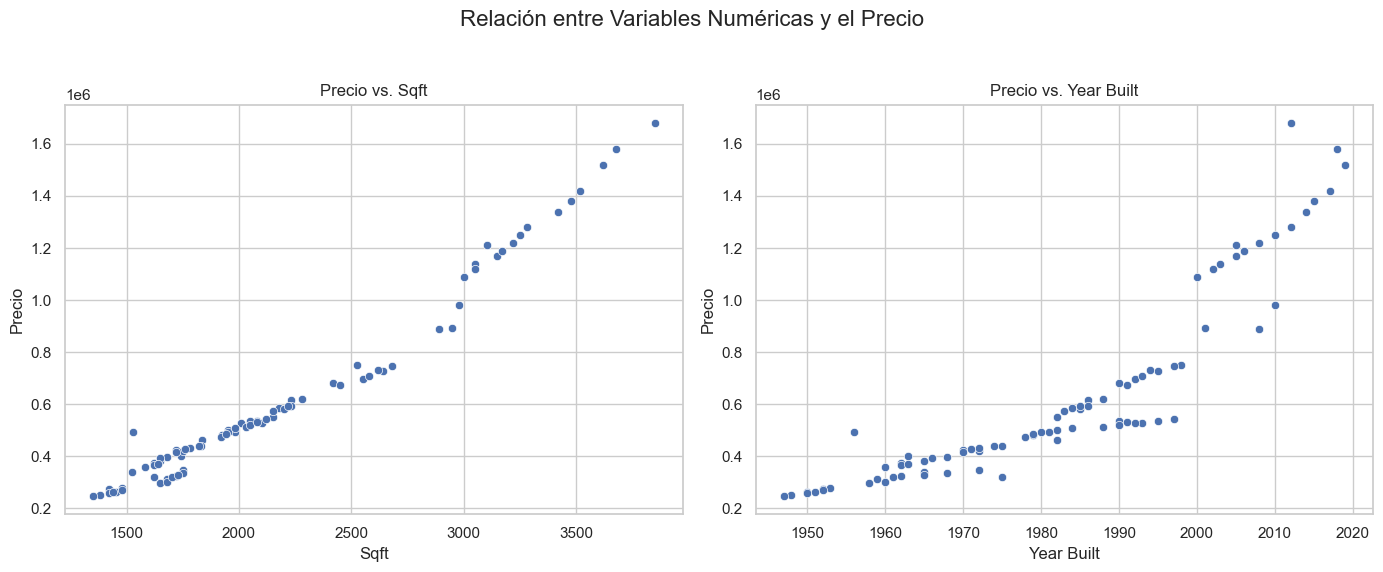

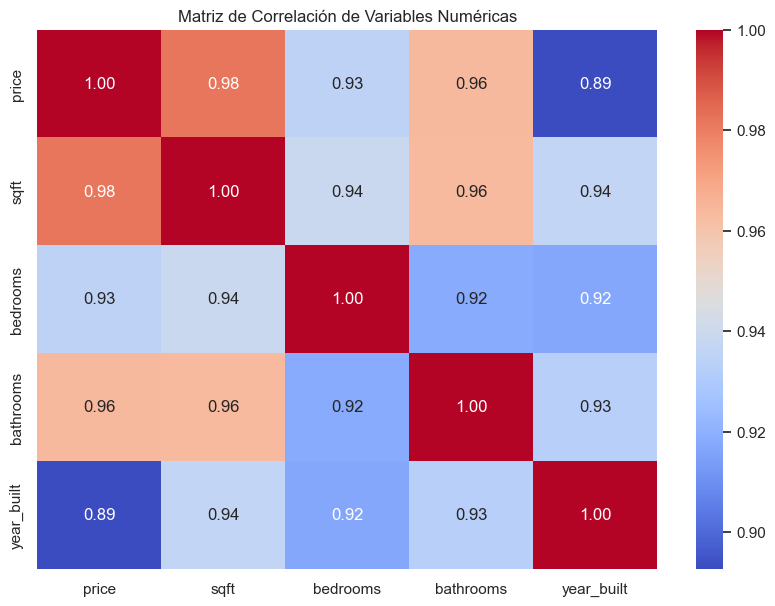


Observaciones sobre variables numéricas:
- 'sqft' muestra una fuerte correlación positiva (0.98) con 'price', confirmando que es un predictor clave.
- 'year_built' tiene una correlación positiva moderada (0.89), sugiriendo que las casas más recientes tienden a ser más caras.


In [10]:
# ==============================================================================
# PASO 4: ANÁLISIS DE VARIABLES NUMÉRICAS
# ==============================================================================
print("\n--- 4. Análisis de Variables Numéricas vs. Precio ---")

# Gráficos de dispersión para entender la relación con el precio
numeric_features = ['sqft', 'year_built']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'Precio vs. {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Precio')

plt.suptitle('Relación entre Variables Numéricas y el Precio', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Matriz de correlación para cuantificar relaciones lineales
plt.figure(figsize=(10, 7))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

print("\nObservaciones sobre variables numéricas:")
print("- 'sqft' muestra una fuerte correlación positiva (0.98) con 'price', confirmando que es un predictor clave.")
print("- 'year_built' tiene una correlación positiva moderada (0.89), sugiriendo que las casas más recientes tienden a ser más caras.")



--- 5. Análisis de Variables Categóricas ---

Análisis de Frecuencia de las Categorías:


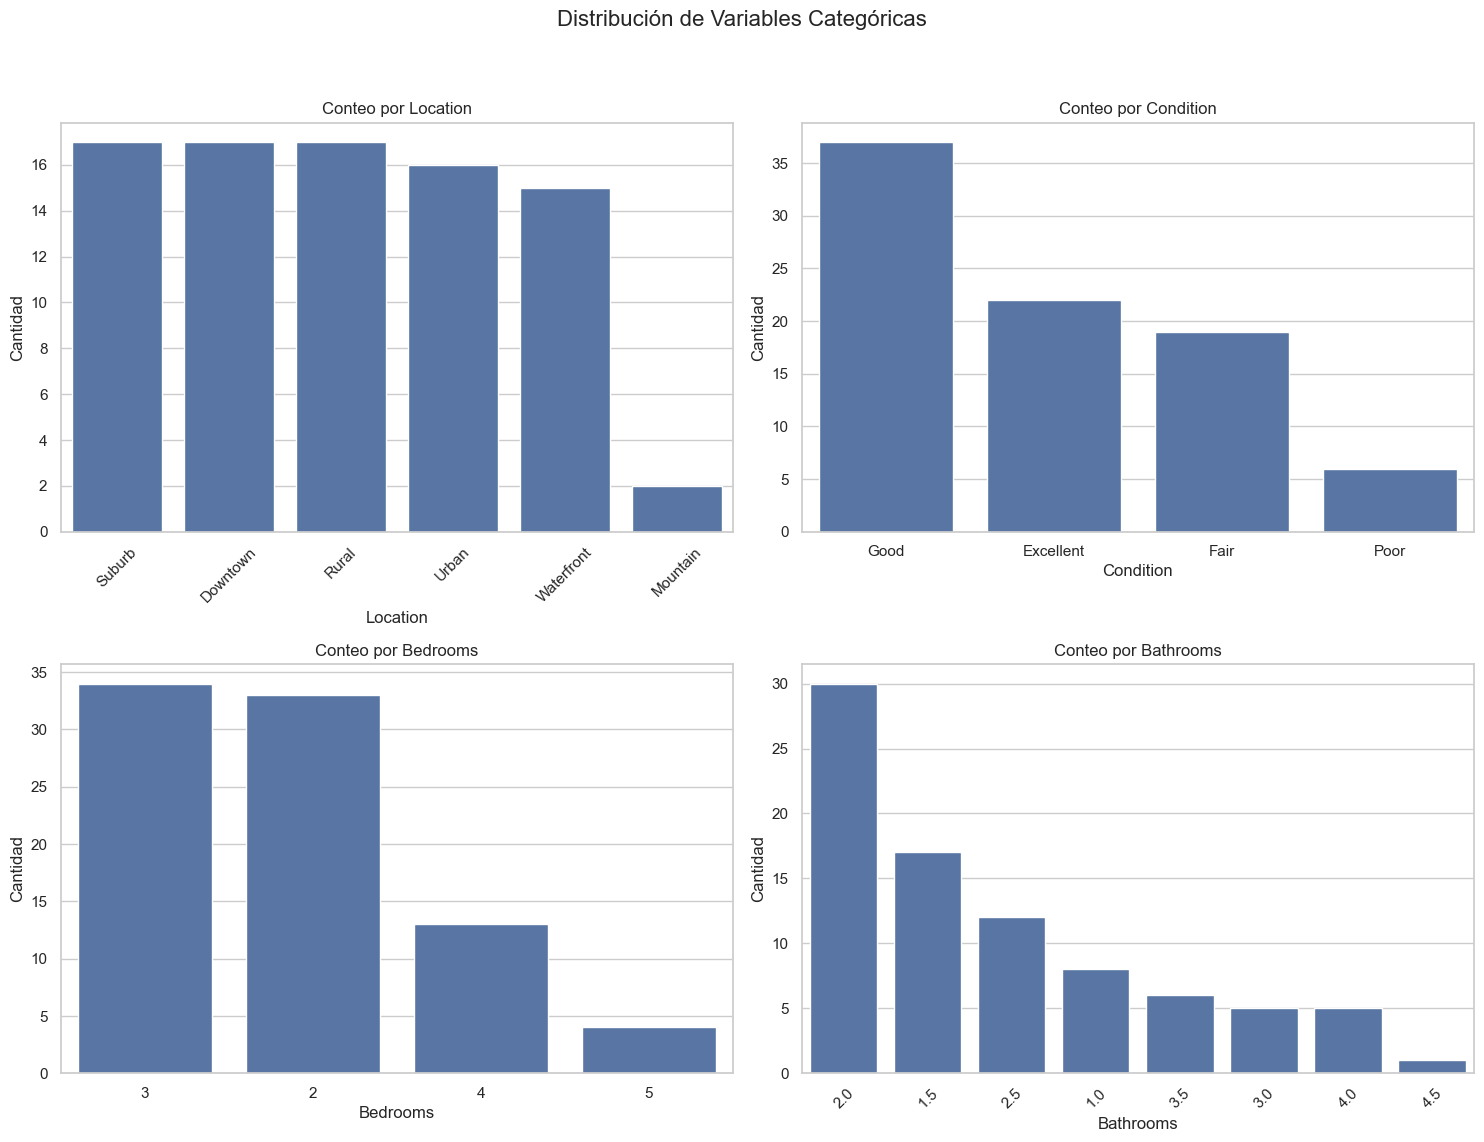


Análisis de la Distribución del Precio por Categoría:


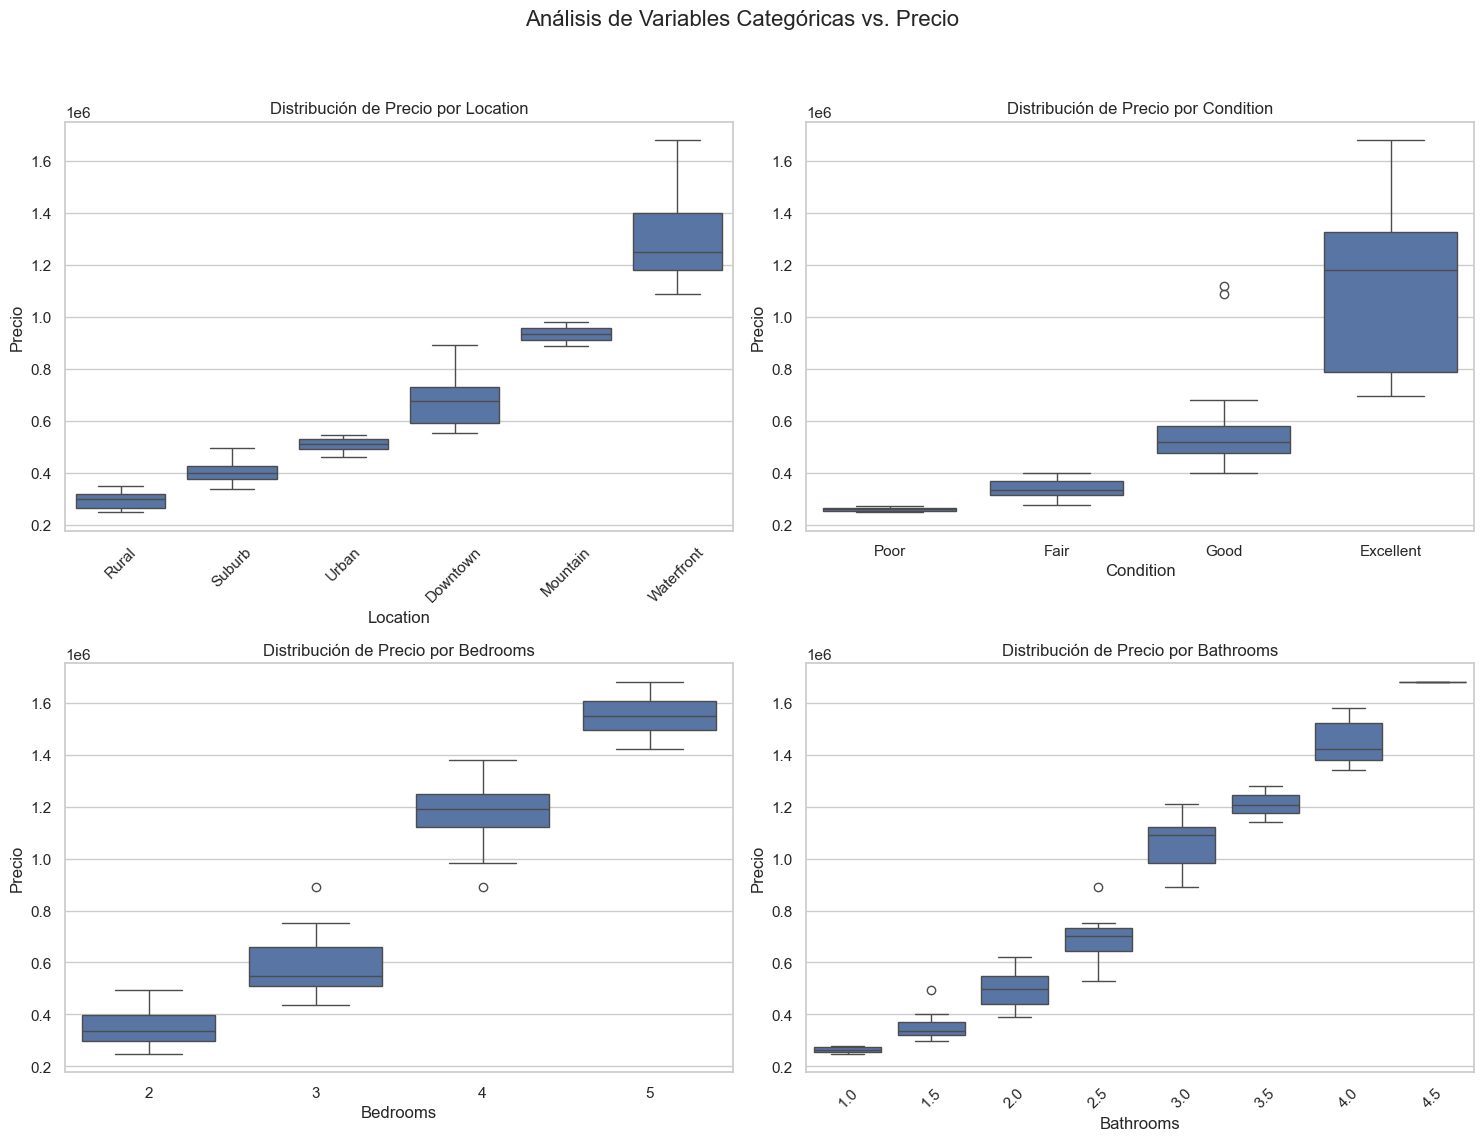


Observaciones sobre variables categóricas:
- El conteo muestra un desbalance en 'location', con 'Suburb' y 'Urban' siendo las más comunes. 'Waterfront' es la menos frecuente, lo que podría explicar su alta varianza en precio.
- El precio mediano aumenta con el número de 'bedrooms' y 'bathrooms'.
- La 'location' es un factor determinante. Las propiedades 'Waterfront' son significativamente más caras.
- La 'condition' de la propiedad muestra una clara tendencia positiva con el precio.

--- Fin del Análisis Exploratorio ---


In [11]:
# ==============================================================================
# PASO 5: ANÁLISIS DE VARIABLES CATEGÓRICAS
# ==============================================================================
print("\n--- 5. Análisis de Variables Categóricas ---")

categorical_features = ['location', 'condition', 'bedrooms', 'bathrooms']

# 5.1: Distribución de las categorías (Conteo)
print("\nAnálisis de Frecuencia de las Categorías:")
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Conteo por {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Cantidad')
    if df[feature].nunique() > 4:
        plt.xticks(rotation=45)

plt.suptitle('Distribución de Variables Categóricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5.2: Relación de las categorías con el precio (Distribución del precio)
print("\nAnálisis de la Distribución del Precio por Categoría:")
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    # Ordenamos las categorías por la mediana del precio para una mejor visualización.
    order = df.groupby(feature)['price'].median().sort_values().index
    sns.boxplot(x=feature, y='price', data=df, order=order)
    plt.title(f'Distribución de Precio por {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Precio')
    if df[feature].nunique() > 4:
        plt.xticks(rotation=45)

plt.suptitle('Análisis de Variables Categóricas vs. Precio', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nObservaciones sobre variables categóricas:")
print("- El conteo muestra un desbalance en 'location', con 'Suburb' y 'Urban' siendo las más comunes. 'Waterfront' es la menos frecuente, lo que podría explicar su alta varianza en precio.")
print("- El precio mediano aumenta con el número de 'bedrooms' y 'bathrooms'.")
print("- La 'location' es un factor determinante. Las propiedades 'Waterfront' son significativamente más caras.")
print("- La 'condition' de la propiedad muestra una clara tendencia positiva con el precio.")

print("\n--- Fin del Análisis Exploratorio ---")

In [ ]:
# Next Step 
# Feature Engineering
# Create new features or modify existing ones
